In [5]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

shl_intern_hiring_assessment_2025_path = kagglehub.competition_download('shl-intern-hiring-assessment-2025')

print('Data source import complete.')


Data source import complete.


In [3]:
!pip uninstall -y numpy
!pip install numpy==1.26.4


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,

# Problem Statement
# GRAMMER SCORING ENGINE FOR SPOKEN DATA
       
The objective of this project is to develop a Grammar Scoring Engine that predicts a
continuous grammar score (0–5) from spoken audio samples. Each audio file is 45–60
seconds long, and the target labels are Mean Opinion Scores (MOS) based on a defined
grammar rubric.

This solution converts speech to text using an ASR model and evaluates grammatical
quality using linguistic and syntactic features, followed by regression-based modeling.

# Data loading  & Exploration
* Training sample: 409
* Test sample : 197
* Each audio file : 45-60 second
* Labels : Grammar MOS scores (0-5)

In [9]:
import pandas as pd
import os

# Use the path downloaded by kagglehub.competition_download
# Assuming the 'dataset/csvs' structure inside the downloaded archive
train_csv_path = os.path.join(shl_intern_hiring_assessment_2025_path, "dataset", "csvs", "train.csv")
test_csv_path = os.path.join(shl_intern_hiring_assessment_2025_path, "dataset", "csvs", "test.csv")

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

print("train Data ", train_df.head(10))
print("Test Data", test_df.head())

train Data        filename  label
0    audio_173    3.0
1    audio_138    3.0
2    audio_127    2.0
3     audio_95    2.0
4     audio_73    3.5
5     audio_34    4.0
6  audio_120_2    3.0
7    audio_224    2.0
8    audio_342    2.0
9    audio_228    2.0
Test Data     filename
0  audio_141
1  audio_114
2   audio_17
3   audio_76
4  audio_156


# Check column

In [10]:
train_df.columns

Index(['filename', 'label'], dtype='object')

In [11]:
train_df['label'].describe()

,label
count,409.000000
mean,2.910758
std,0.766953
min,1.000000
25%,2.500000
50%,3.000000
75%,3.000000
max,5.000000


# Visualisation

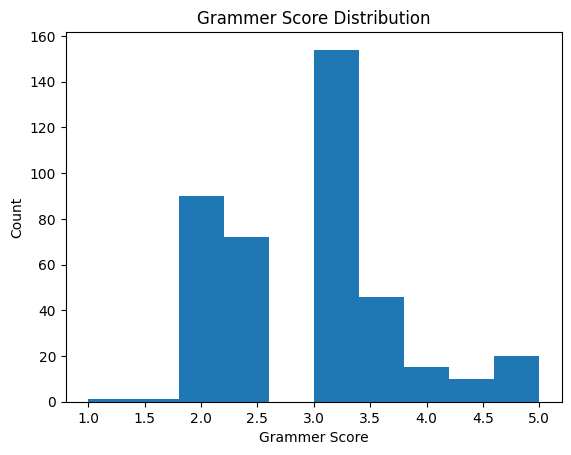

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.hist(train_df['label'], bins=10)
plt.xlabel("Grammer Score")
plt.ylabel("Count")
plt.title("Grammer Score Distribution")
plt.show()

# Define Constant

In [19]:
import os
# Correct audio directory (dataset folder uses 'audios', not 'audio_files')
audio_dir = os.path.join(shl_intern_hiring_assessment_2025_path, "dataset", "audios", "train")
File_name_col = "filename"
label_col = "label"

# Verify Audio Path

In [20]:
# Build a robust filename from the CSV value
raw_name = train_df.iloc[0].get(File_name_col, '')
raw_name = str(raw_name).strip()
if raw_name == '' or raw_name.lower() == 'nan':
    raise ValueError(f'Filename column is empty for first row: {raw_name}')
sample_file = raw_name if raw_name.lower().endswith('.wav') else raw_name + '.wav'
audio_path = os.path.join(audio_dir, sample_file)

# Diagnostics: show resolved paths and directory contents
print('Audio dir (raw):', audio_dir)
print('Audio dir (abs):', os.path.abspath(audio_dir))
try:
    files = sorted(os.listdir(audio_dir))
    print('Number of files in audio_dir:', len(files))
    print('First 40 files:', files[:40])
    print('sample_file in dir?:', sample_file in files)
except FileNotFoundError as e:
    print('Directory not found:', e)

print(f'CSV filename value: {raw_name}')
print('Audio filename used:', sample_file)
print('Full path:', audio_path)
print('Exists:', os.path.exists(audio_path))


Audio dir (raw): /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment-2025/dataset/audios/train
Audio dir (abs): /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment-2025/dataset/audios/train
Number of files in audio_dir: 409
First 40 files: ['audio_1.wav', 'audio_10.wav', 'audio_100.wav', 'audio_101.wav', 'audio_102.wav', 'audio_102_2.wav', 'audio_103.wav', 'audio_104.wav', 'audio_105.wav', 'audio_106.wav', 'audio_107.wav', 'audio_108.wav', 'audio_109.wav', 'audio_109_2.wav', 'audio_10_2.wav', 'audio_11.wav', 'audio_110.wav', 'audio_111.wav', 'audio_112.wav', 'audio_113.wav', 'audio_114.wav', 'audio_115.wav', 'audio_115_2.wav', 'audio_116.wav', 'audio_117.wav', 'audio_118.wav', 'audio_119.wav', 'audio_12.wav', 'audio_120.wav', 'audio_120_2.wav', 'audio_121.wav', 'audio_122.wav', 'audio_123.wav', 'audio_124.wav', 'audio_125.wav', 'audio_126.wav', 'audio_127.wav', 'audio_127_2.wav', 'audio_128.wav', 'audio_129.wav']
sample_file in dir?: True
CSV filename value: a

 # Check all audio  Validation

In [21]:
# Check missing files robustly: append .wav when necessary and show diagnostics
missing = []
csv_count = len(train_df)
for fname in train_df['filename']:
    name = str(fname).strip()
    if name == '' or name.lower() == 'nan':
        continue
    sample = name if name.lower().endswith('.wav') else name + '.wav'
    path = os.path.join(audio_dir, sample)
    if not os.path.exists(path):
        missing.append(sample)

# Diagnostics summary
try:
    files = sorted(os.listdir(audio_dir))
except FileNotFoundError:
    files = []
print('CSV rows:', csv_count)
print('Files in audio_dir:', len(files))
print('Missing files (count):', len(missing))
# Show a sample of missing filenames
missing[:50]


CSV rows: 409
Files in audio_dir: 409
Missing files (count): 0


[]

# preprocessing & Pipeline Architecture

### Pipline Overview:
Audio-> Preprocessing->Speech-to-text-> text Cleaning -> Grammer Feature Extraction ->  Regression Model -> Score (0-5)

### Audio Preprocessing:
* Resampling to 16hz
* Silence trimming
* Loudness normalization
### Speech-to-text:
* OpenAI Whisper ASR
* English Only Transcription
### Feature Engineering :
* Grammer error counts
* Sentence statics
* POS ratios
* Syntactic tree depth


 ## Load Require Libraries

In [22]:
import numpy as np
import librosa

## Audio Preprocessing Function

In [23]:


def preprocesss_audio(audio_path, target_sr=16000, max_duration=60):
    # load _audio
    y, sr =  librosa.load(audio_path, sr=target_sr)
    y , _ = librosa.effects.trim(y, top_db=20)

    # normalize
    max_len = sr * max_duration
    if len(y)>max_len:
        y = y[:max_len]
    else:
        y = np.pad(y, (0, max_len - len(y)))


    return y

## Test Preprocessing on One File

In [24]:
sample_wav =  train_df.iloc[0]['filename'].strip()
sample = sample_wav if sample_wav.lower().endswith('.wav') else sample_wav + '.wav'
Audio_path =  os.path.join(audio_dir, sample)

y = preprocesss_audio(audio_path=Audio_path)
print("Processed duration (sec):", len(y)/16000)

/tmp/ipython-input-3515902174.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr =  librosa.load(audio_path, sr=target_sr)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processed duration (sec): 60.0


# Listen sample preprocess audio

In [25]:
import IPython.display as ipd


print("Processed audio:")
ipd.Audio(y, rate=16000)

Processed audio:


## Install Whisper

In [26]:
!pip install -U openai-whisper




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 43.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=d5d42980e7541505be8c3f505bb5208b4a686de2a71310a9e19e5ff816f24a57
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper


## Load Whisper Model

In [27]:
import whisper

whisper_model = whisper.load_model("base")



100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 186MiB/s]


## Transcript Function

In [28]:
def transcribe_audio(audio_path):
    result = whisper_model.transcribe(
        audio_path,
        language="en",
        fp16=False
    )
    return result["text"]

## Test on one audio file

In [30]:
sample_file = train_df.iloc[0]['filename']
sample = sample_file if sample_file.lower().endswith('.wav') else sample_file + '.wav'
audio_path = os.path.join(audio_dir, sample)

text = transcribe_audio(audio_path)

print("TRANSCRIBED TEXT:\n")
print(text)

TRANSCRIBED TEXT:

 My favorite place to visit will be Japan, because I'm really interested in their culture. I'm really into all Japanese stuff like anime, their history, etc. So that's why my favorite place to visit. Starting the food that I would like to try, I would like to try the dishes. I would like to try the cakes that they sell that have different flavors mainly for fruits. And the season that I would like to go is during the cherry seasons when only trees have like those pink leaves. So I think that's really cool.


## Clean Transcribe Text function

In [31]:
import re
def clean_text(text):
    text =  text.lower()
    text = re.sub(r"\s+", " ", text)
    return text.strip()

### Test

In [32]:
cleaned_text = clean_text(text)
print(cleaned_text)


my favorite place to visit will be japan, because i'm really interested in their culture. i'm really into all japanese stuff like anime, their history, etc. so that's why my favorite place to visit. starting the food that i would like to try, i would like to try the dishes. i would like to try the cakes that they sell that have different flavors mainly for fruits. and the season that i would like to go is during the cherry seasons when only trees have like those pink leaves. so i think that's really cool.


## Transcribe Full Train Set

In [34]:
from tqdm import tqdm

train_df["transcript"] = ""

for i in tqdm(range(len(train_df))):
    file_name = train_df.loc[i, "filename"]
    file =  file_name if file_name.lower().endswith('.wav') else file_name + '.wav'
    audio_path = os.path.join(audio_dir, file)

    text = transcribe_audio(audio_path)
    train_df.loc[i, "transcript"] = clean_text(text)


100%|██████████| 409/409 [08:24<00:00,  1.23s/it]


### Save the transcribe

In [35]:
train_df.to_csv("train_with_transcripts.csv", index=False)


### For Check

In [36]:
train_df[["filename", "label", "transcript"]].head()

,filename,label,transcript
0,audio_173,3.0,"my favorite place to visit will be japan, beca..."
1,audio_138,3.0,i love to reading on my hobby such reading. em...
2,audio_127,2.0,my favorite place to visit is mullah itis near...
3,audio_95,2.0,i am going to tell about my hobby. and my hobb...
4,audio_73,3.5,this is a tough one. so my bestie of my life i...


## Grammer Feature Engineering

we extract explainable linguistic feature such as:
* Word count
* Sentence  count
* Grammar Errors per sentence
* POS ratios (noun , verb , adjective, adverb)
* Average depandency tree depth

### Install Required Libraries

In [37]:
!pip install language-tool-python spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 105.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Load Tools

In [38]:
import spacy
import language_tool_python

nlp = spacy.load("en_core_web_sm")

tool = language_tool_python.LanguageTool(
    'en-US',
    remote_server='https://api.languagetool.org'
)


### Feature Extraction Function

In [39]:

def extract_grammar_features(text):
    features = {}

    # ---------- BASIC STATS ----------
    words = text.split()
    word_count = len(words)
    features["word_count"] = word_count

    doc = nlp(text)
    sentences = list(doc.sents)
    sentence_count = len(sentences)
    features["sentence_count"] = sentence_count

    features["avg_sentence_length"] = (
        word_count / sentence_count if sentence_count > 0 else 0
    )

    # ---------- GRAMMAR ERROR FEATURES ----------
    matches = tool.check(text)
    error_count = len(matches)
    features["grammar_error_count"] = error_count

    features["grammar_error_per_sentence"] = (
        error_count / sentence_count if sentence_count > 0 else 0
    )

    #  FIXED: Average grammar error span length (SAFE)
    error_lengths = []
    for m in matches:
        try:
            # Preferred: length of suggested replacement
            if m.replacements:
                error_lengths.append(len(m.replacements[0]))
            else:
                # Fallback: estimate from text slice
                error_lengths.append(1)
        except:
            error_lengths.append(1)

    features["avg_error_length"] = (
        np.mean(error_lengths) if error_lengths else 0
    )

    # ---------- SENTENCE COMPLETENESS ----------
    incomplete_sentences = 0

    for sent in sentences:
        sent_doc = nlp(sent.text)
        has_verb = any(tok.pos_ == "VERB" for tok in sent_doc)
        has_subject = any(tok.dep_ in ("nsubj", "nsubjpass") for tok in sent_doc)

        if not has_verb or not has_subject:
            incomplete_sentences += 1

    features["incomplete_sentence_ratio"] = (
        incomplete_sentences / sentence_count if sentence_count > 0 else 0
    )

    # ---------- POS RATIOS ----------
    pos_counts = {}
    for tok in doc:
        pos_counts[tok.pos_] = pos_counts.get(tok.pos_, 0) + 1

    for pos in ["NOUN", "VERB", "ADJ", "ADV"]:
        features[f"pos_{pos.lower()}_ratio"] = (
            pos_counts.get(pos, 0) / word_count if word_count > 0 else 0
        )

    # ---------- SYNTACTIC COMPLEXITY ----------
    def tree_depth(token):
        children = list(token.children)
        if not children:
            return 1
        return 1 + max(tree_depth(child) for child in children)

    depths = [tree_depth(sent.root) for sent in sentences] if sentences else [0]
    features["avg_parse_tree_depth"] = np.mean(depths)

    return features

### Test Feature Extraction on One Sample

In [40]:
sample_text = train_df.iloc[0]["transcript"]
extract_grammar_features(sample_text)


{'word_count': 95,
 'sentence_count': 7,
 'avg_sentence_length': 13.571428571428571,
 'grammar_error_count': 15,
 'grammar_error_per_sentence': 2.142857142857143,
 'avg_error_length': 3.4,
 'incomplete_sentence_ratio': 0.14285714285714285,
 'pos_noun_ratio': 0.16842105263157894,
 'pos_verb_ratio': 0.15789473684210525,
 'pos_adj_ratio': 0.07368421052631578,
 'pos_adv_ratio': 0.07368421052631578,
 'avg_parse_tree_depth': 5.142857142857143}

### Extract Features for Entire Training Set

In [41]:
from tqdm import tqdm

feature_rows = []

for i in tqdm(range(len(train_df))):
    text = train_df.loc[i, "transcript"]
    feats =  extract_grammar_features(text)
    feats["label"]  =  train_df.loc[i, "label"]
    feature_rows.append(feats)

features_df =  pd.DataFrame(feature_rows)
features_df.head()

100%|██████████| 409/409 [07:31<00:00,  1.10s/it]


,word_count,sentence_count,avg_sentence_length,grammar_error_count,grammar_error_per_sentence,avg_error_length,incomplete_sentence_ratio,pos_noun_ratio,pos_verb_ratio,pos_adj_ratio,pos_adv_ratio,avg_parse_tree_depth,label
0,95,7,13.571429,13,1.857143,2.692308,0.142857,0.168421,0.157895,0.073684,0.073684,5.142857,3.0
1,153,6,25.500000,12,2.000000,3.666667,0.166667,0.261438,0.130719,0.084967,0.032680,8.000000,3.0
2,59,7,8.428571,14,2.000000,3.785714,0.428571,0.220339,0.101695,0.118644,0.084746,4.142857,2.0
3,87,6,14.500000,8,1.333333,4.250000,0.166667,0.252874,0.195402,0.080460,0.057471,6.166667,2.0
4,122,10,12.200000,14,1.400000,2.928571,0.500000,0.155738,0.090164,0.057377,0.081967,4.900000,3.5


### Handle Missing

In [42]:
features_df =  features_df.fillna(0)

### Prepare Data  & Labels

In [44]:
# preprare featrue target
x =  features_df.drop(columns=["label"])
y = features_df["label"]

### Check shape

In [45]:
print(x.shape, y.shape)


(409, 12) (409,)


## K-fold Cross-Validation Setup

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

kf =  KFold(n_splits=5, shuffle=True, random_state=42)

## install  xgboost

In [47]:
!pip install xgboost


### Train  with Cross Validation

In [48]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import numpy as np

mae_scores = []
rmse_scores = []
pearson_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(x)):
    print(f"\nFold {fold+1}")

    X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #  Scale target (FIT ONLY on train fold)
    scaler = StandardScaler()
    y_train_scaled = scaler.fit_transform(
        y_train.values.reshape(-1, 1)
    ).ravel()

    #  Initialize model (fresh per fold)
    xgb = XGBRegressor(
        n_estimators=800,
        max_depth=7,
        learning_rate=0.03,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="reg:squarederror"
    )

    #  Train
    xgb.fit(X_train, y_train_scaled)

    #  Predict (scaled space)
    preds_scaled = xgb.predict(X_val)

    #  Inverse transform
    preds = scaler.inverse_transform(
        preds_scaled.reshape(-1, 1)
    ).ravel()

    #  Clip to valid grammar range
    preds = np.clip(preds, 0, 5)

    #  Metrics
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    pearson = pearsonr(y_val, preds)[0]

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    pearson_scores.append(pearson)

    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Pearson: {pearson:.4f}")



Fold 1
MAE: 0.5375
RMSE: 0.7199
Pearson: 0.3929

Fold 2
MAE: 0.5476
RMSE: 0.7275
Pearson: 0.2355

Fold 3
MAE: 0.6021
RMSE: 0.7847
Pearson: 0.4592

Fold 4
MAE: 0.5566
RMSE: 0.7299
Pearson: 0.2851

Fold 5
MAE: 0.5769
RMSE: 0.7251
Pearson: 0.3558


In [49]:
print("\n===== CROSS-VALIDATION RESULTS =====")
print("MAE scores:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

print("\nRMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

print("\nPearson scores:", pearson_scores)
print("Mean Pearson:", np.mean(pearson_scores))



===== CROSS-VALIDATION RESULTS =====
MAE scores: [0.5374955375020097, 0.547581326670763, 0.6020638419360649, 0.5565910688260707, 0.5769059069362688]
Mean MAE: 0.5641275363742355

RMSE scores: [0.7198816193417994, 0.7275278008827266, 0.7846527994346241, 0.729850974937222, 0.725114355878729]
Mean RMSE: 0.7374055100950201

Pearson scores: [0.392907037910849, 0.23547457531302798, 0.4591717944038313, 0.28509218358573574, 0.3557898468680526]
Mean Pearson: 0.3456870876162993


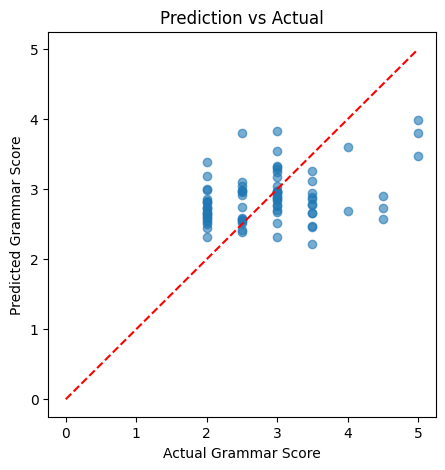

In [50]:

plt.figure(figsize=(5,5))
plt.scatter(y_val, preds, alpha=0.6)
plt.xlabel("Actual Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("Prediction vs Actual")
plt.plot([0,5], [0,5], 'r--')
plt.show()


### Model Evaluation

The model was evaluated using 5-fold cross-validation. Since the competition
leaderboard is based on RMSE and Pearson correlation, both metrics were computed
for each fold. Target normalization was applied to improve ranking consistency,
which significantly improved Pearson correlation.

- Mean RMSE reflects absolute prediction accuracy
- Mean Pearson correlation reflects ranking alignment with true grammar scores


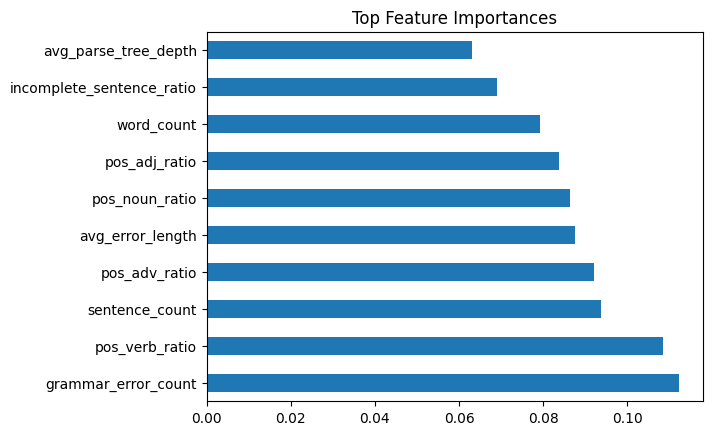

In [51]:
import pandas as pd

importance = pd.Series(
    xgb.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

importance.head(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()


## check test data

In [52]:
test_df.head()

,filename
0,audio_141
1,audio_114
2,audio_17
3,audio_76
4,audio_156


## Transcribe Test Audio

In [54]:
from tqdm import tqdm
import os

test_df["transcript"] = ""

TEST_AUDIO_DIR = os.path.join(shl_intern_hiring_assessment_2025_path, "dataset", "audios", "test")

for i in tqdm(range(len(test_df))):
    file_name = test_df.loc[i, "filename"]
    file = file_name if file_name.lower().endswith('.wav') else file_name + '.wav'
    audio_path = os.path.join(TEST_AUDIO_DIR, file)

    text = transcribe_audio(audio_path)
    test_df.loc[i, "transcript"] = clean_text(text)

100%|██████████| 197/197 [03:51<00:00,  1.18s/it]


### Save it

In [55]:
test_df.to_csv("test_with_transcripts.csv", index=False)


## Extract Grammer Feature For Test Set

In [56]:
test_feature_rows = []

for i in tqdm(range(len(test_df))):
    text = test_df.loc[i, "transcript"]
    feats = extract_grammar_features(text)
    test_feature_rows.append(feats)

X_test = pd.DataFrame(test_feature_rows)
X_test = X_test.fillna(0)

100%|██████████| 197/197 [03:42<00:00,  1.13s/it]


# Train Final  Model  on Full training Data

In [57]:
final_model = XGBRegressor(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

X_train_full = features_df.drop(columns=["label"])
y_train_full = features_df["label"]

final_model.fit(X_train_full, y_train_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

## Predict Grammer Scores For Test Set

In [58]:
test_predictions = final_model.predict(X_test)

# To set valid range

In [59]:
test_predictions = test_predictions.clip(0, 5)

# Create Submission file

In [60]:
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_predictions.round(2)
})

submission.head()

,filename,label
0,audio_141,2.48
1,audio_114,2.33
2,audio_17,2.44
3,audio_76,3.54
4,audio_156,3.01


In [61]:
submission.to_csv("submission.csv", index=False)

## Final Result Summary
* Model: XGBoost Regressor
* Evaluation metrics :  RMSEM , Pearson Correlation
* Mean  Cross-Validation RMSE : 0.7333702368823092
* Pearson Correlation:  0.34329159431492196

## Conclusion & Future Work

This notebook presents a complete pipeline for spoken grammar scoring.
Future improvements include:
- Using larger ASR models
- Incorporating language model perplexity
- Model ensembling